In [78]:
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

##### Downloading CIFAR 10 Dataset

In [79]:
transform = transforms.Compose([transforms.Resize((32,32)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ])

train_set = datasets.CIFAR10(root='./data', train = True, download = True, transform = transform)
test_set = datasets.CIFAR10(root='./data', train = False, download = True, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
train_set[1]

(tensor([[[ 0.2078, -0.0118, -0.1765,  ..., -0.2863, -0.3176, -0.3804],
          [ 0.0980,  0.1373, -0.0196,  ..., -0.2471, -0.3961, -0.4431],
          [ 0.0980,  0.0902, -0.0980,  ..., -0.3804, -0.4667, -0.4745],
          ...,
          [ 0.3725,  0.2235,  0.2078,  ..., -0.6706, -0.5216, -0.2706],
          [ 0.2941,  0.2235,  0.2471,  ..., -0.1922, -0.0353,  0.0275],
          [ 0.2784,  0.2392,  0.2784,  ...,  0.1216,  0.1216,  0.1216]],
 
         [[ 0.3882,  0.0745, -0.1843,  ..., -0.2549, -0.2941, -0.3647],
          [ 0.2549,  0.2000, -0.0196,  ..., -0.2235, -0.3725, -0.4275],
          [ 0.2157,  0.1451, -0.0980,  ..., -0.3569, -0.4510, -0.4588],
          ...,
          [ 0.3098,  0.2078,  0.2549,  ..., -0.7333, -0.5843, -0.3490],
          [ 0.2078,  0.1922,  0.2627,  ..., -0.2706, -0.1059, -0.0510],
          [ 0.1608,  0.1608,  0.2235,  ...,  0.0431,  0.0510,  0.0431]],
 
         [[ 0.4667,  0.0667, -0.2549,  ..., -0.4431, -0.4431, -0.4510],
          [ 0.3255,  0.2078,

In [80]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [81]:
print('Training set samples:', len(train_set))
print('Test set samples:', len(test_set))

Training set samples: 50000
Test set samples: 10000


In [82]:
def im_convert(tensor):  
  image = tensor.cpu().clone().detach().numpy() # This process will happen in normal cpu.
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

In [83]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 20)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 20 )
print(len(train_loader))
print(len(test_loader))

2500
500


In [84]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images[2])

tensor([[[ 1.0000,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  0.9922,  0.9922,  ...,  0.9922,  0.9922,  0.9922],
         ...,
         [-0.1137, -0.1294, -0.1765,  ..., -0.4353, -0.4353, -0.4353],
         [-0.1294, -0.1843, -0.2235,  ..., -0.4667, -0.4510, -0.3882],
         [-0.1686, -0.2235, -0.2549,  ..., -0.3882, -0.3804, -0.3725]],

        [[ 1.0000,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  0.9922,  0.9922,  ...,  0.9922,  0.9922,  0.9922],
         ...,
         [-0.0588, -0.0745, -0.1216,  ..., -0.3647, -0.3725, -0.3725],
         [-0.0745, -0.1294, -0.1686,  ..., -0.4118, -0.4039, -0.3412],
         [-0.1137, -0.1686, -0.2000,  ..., -0.3333, -0.3333, -0.3255]],

        [[ 1.0000,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
         [ 1.0000,  1.0000,  1.0000,  ...,  1

In [85]:
print(images[2].shape)

torch.Size([3, 32, 32])


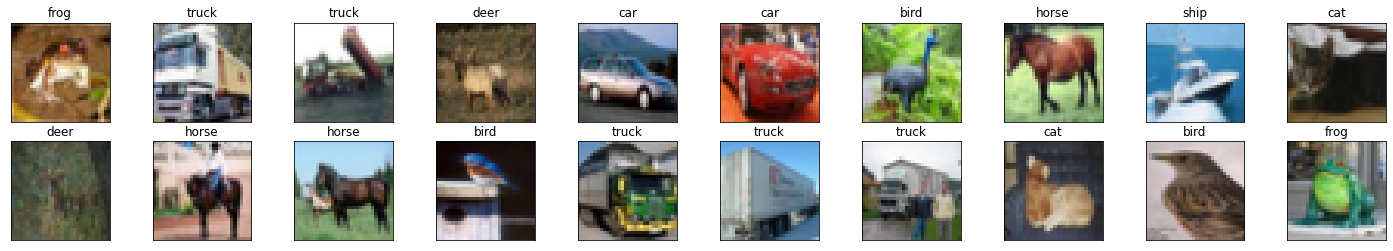

In [86]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4)) 

# We plot 20 images from our train_dataset
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[]) 
  plt.imshow(im_convert(images[idx])) #converting to numpy array as plt needs it.
  ax.set_title(classes[labels[idx].item()])

In [87]:
# Converting to numpy
# Separating trainset/testset data/label
X_train  = train_set.data
X_test  = test_set.data
Y_train = np.array(train_set.targets)
Y_test  = np.array(test_set.targets)

# flatten out all images to be one-dimensional
X_train_rows = X_train.reshape(X_train.shape[0], 32 * 32 * 3)  # converting to row vector 
X_test_rows = X_test.reshape(X_test.shape[0], 32 * 32 * 3)     # converting to row vector

In [88]:
print(type(X_train[1]))
print(X_train.shape)
print(X_train[1].shape)
print(type(X_train_rows[1]))
print('After converted to row vector: ', X_train_rows[1].shape)

<class 'numpy.ndarray'>
(50000, 32, 32, 3)
(32, 32, 3)
<class 'numpy.ndarray'>
After converted to row vector:  (3072,)


In [89]:
X_train_rows[1]

array([154, 177, 187, ..., 143, 133, 144], dtype=uint8)

In [90]:
# One hot labels for training data 
one_hot_labels = np.zeros((50000, 10))      # As our train set has 50000 data and 10 classes
for i in range (50000):
    one_hot_labels[i, Y_train[i]] = 1

In [91]:
one_hot_labels[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [92]:
one_hot_labels[555]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

##### Defining sigmoid, sigmoid deravative and softmax function

In [93]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

##### Building three layer neural network (two hidden layer and one output layer)

In [94]:
instances = X_train_rows.shape[0]
attributes = X_train_rows.shape[1]
print(instances, attributes)

50000 3072


In [95]:
instances = X_train_rows.shape[0]
attributes = X_train_rows.shape[1]

hidden_layer1 = 1000
hidden_layer2 = 100
output_layer = 10

np.random.seed(42)

wh1 = np.random.rand(attributes, hidden_layer1)        # 3072 * 1000
bh1 = np.random.randn(hidden_layer1)                   # 1000

wh2 = np.random.rand(hidden_layer1, hidden_layer2)      # 1000 * 100
bh2 = np.random.randn(hidden_layer2)                    #100

wo = np.random.rand(hidden_layer2, output_layer)        # 100 * 10
bo = np.random.randn(output_layer)                      # 10

lr = 0.0001

error_cost = []

for epoch in range (10):
    #############################
    ######## Feedforward ########
    #############################
    
    # phase 1
    zh1 = np.dot(X_train_rows, wh1) + bh1
    ah1 = sigmoid(zh1)
    
    # phase 2
    zh2 = np.dot(ah1, wh2) + bh2
    ah2 = sigmoid(zh2)
    
    # phase 3
    zo = np.dot(ah2, wo) + bo
    ao = softmax(zo)
    
    ##################################
    ######## Back propagation ########
    ##################################
    
    # phase 1
    
    dcost_dzo = ao - one_hot_labels
    dzo_dwo = ah2
    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)
    dcost_bo = dcost_dzo
    
    # phase 2
    
    dzo_dah2 = wo
    dcost_dah2 = np.dot(dcost_dzo, dzo_dah2.T)
    dah2_dzh2 = sigmoid_der(zh2)
    dzh2_dwh2 = ah1
    dcost_w2 = np.dot(dzh2_dwh2.T, dah2_dzh2 * dcost_dah2)
    dcost_bh2 = dcost_dah2 * dah2_dzh2
    
    # phase 3
    dzh2_dah1 = wh2 
    dcost_dzh2 = dcost_dah2 * dah2_dzh2 
    dcost_dah1 = np.dot(dcost_dzh2, dzh2_dah1.T)
    dah1_dzh1 = sigmoid_der(zh1)
    dzh1_dw1 = X_train_rows
    dcost_w1 = np.dot(dzh1_dw1.T, dcost_dah1 * dah1_dzh1)
    
    dcost_bh1 = dcost_dah1 * dah1_dzh1
    
    #### Update weights and bias ######
    
    wh1 -= lr * dcost_w1
    bh1 -= lr * dcost_bh1.sum(axis=0)
    
    wh2 -= lr * dcost_w2
    bh2 -= lr * dcost_bh2.sum(axis=0)
    
    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)
    
    
    loss = np.sum(-one_hot_labels * np.log(ao))
    print('Loss function value: ', loss)
    error_cost.append(loss)
    

Loss function value:  315136.1746229307
Loss function value:  2541646.8353977636
Loss function value:  4715079.856688672
Loss function value:  6824243.558809915
Loss function value:  8159538.595909369
Loss function value:  10299518.12429281
Loss function value:  11174386.8034213
Loss function value:  13338004.79707062
Loss function value:  13506692.97607325
Loss function value:  15669355.670618674


In [32]:
wh1

array([[0.37454012, 0.95071431, 0.73199394, ..., 0.13681863, 0.95023735,
        0.44600577],
       [0.18513293, 0.54190095, 0.87294584, ..., 0.06895802, 0.05705472,
        0.28218707],
       [0.26170568, 0.2469788 , 0.90625458, ..., 0.30978786, 0.29004553,
        0.87141403],
       ...,
       [0.146626  , 0.06055295, 0.02363703, ..., 0.55279711, 0.84883805,
        0.5989377 ],
       [0.41229822, 0.76369006, 0.39738906, ..., 0.50913062, 0.7864801 ,
        0.52835075],
       [0.38526014, 0.77287447, 0.65283495, ..., 0.81450478, 0.99987011,
        0.65693526]])

In [96]:
 def prediction(test_data):
        
        predicted_class = np.zeros(test_data.shape[0], dtype = test_data.dtype)
        
        for i in range (len(test_data)):
            # phase 1
            zh1 = np.dot(X_train_rows, wh1) + bh1
            ah1 = sigmoid(zh1)
            
            # phase 2
            zh2 = np.dot(ah1, wh2) + bh2
            ah2 = sigmoid(zh2)
            # phase 3
            zo = np.dot(ah2, wo) + bo
            ao = softmax(zo)
            #ao = np.argmax(ao, axis = 1)
            ao = np.argmax(ao)
            predicted_class[i] = ao
            
        return predicted_class
            
        

In [97]:
print(X_test_rows.shape)

(10000, 3072)


In [100]:
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum()

In [105]:
zh1 = np.dot(X_train_rows[67], wh1) + bh1
ah1 = sigmoid(zh1)
print(ah1)
            # phase 2
zh2 = np.dot(ah1, wh2) + bh2
print('zh2: ', zh2)
ah2 = sigmoid(zh2)
print(ah2)
            # phase 3
zo = np.dot(ah2, wo) + bo
print('zo: ', zo)
ao = softmax(zo)
print(ao)
            #ao = np.argmax(ao, axis = 1)
ao = np.argmax(ao)

print(ao)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [98]:
predicted_test = prediction(X_test_rows[2])

KeyboardInterrupt: 

In [77]:
zh1 = np.dot(X_train_rows, wh1) + bh1
ah1 = sigmoid(zh1)
ah1

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [41]:
Y_test[1556]

8

In [35]:
#printing the accuracy 
from sklearn.metrics import accuracy_score
ac = accuracy_score(Y_test,predicted_test)
print('Accuracy is: ', ac )

ValueError: Classification metrics can't handle a mix of multiclass and multiclass-multioutput targets

In [64]:
instances = X_train_rows.shape[0]
attributes = X_train_rows.shape[1]

hidden_layer1 = 1000
hidden_layer2 = 100
output_layer = 10

np.random.seed(42)

wh1 = np.random.rand(attributes, hidden_layer1)        # 3072 * 1000
bh1 = np.random.randn(hidden_layer1)                     # 1000

wh2 = np.random.rand(hidden_layer1, hidden_layer2)      # 1000 * 100
bh2 = np.random.randn(hidden_layer2)                     #100

wo = np.random.rand(hidden_layer2, output_layer)        # 100 * 10
bo = np.random.randn(output_layer)                       # 10

lr = 0.0001

error_cost = []

for epoch in range (10):
    ##  Feedforward
    
    # phase 1
    zh1 = np.dot(X_train_rows, wh1) + bh1
    ah1 = sigmoid(zh1)
    
    # phase 2
    zh2 = np.dot(zh1, wh2) + bh2
    ah2 = sigmoid(zh2)
    
    # phase 3
    zo = np.dot(ah2, wo) + bo
    ao = softmax(zo)
    
    ######## Back 
    

In [72]:
print(ao[1])

c = np.max(ao)
c

[9.58609613e-01 5.98017353e-05 7.91237966e-05 2.05261263e-02
 2.40102897e-04 1.51558128e-03 5.10510748e-04 1.50190256e-02
 5.68777598e-04 2.87133735e-03]


0.9586096127249156